# Web scraping and Stop Words

## INTRODUCTION

When web scraping text-based data, there is often content that needs to be cleaned or filtered out. One issue is how to deal with common words that do not provide much context or meaning to a text such as "to", "me", "it". These are known as stop words and the approach to filter these out often depends on the project requirements. Should just basic Python code do the job? Are default stop word lists in libraries enough? 

In PART I of this project, I will web scrape 'Romeo and Juliet' from the Project Gutenberg website. I will also isolate the play from the rest of the web scraped content, and visualize in an NLTK frequency distribution plot the 30 most frequent words, including stop words.

In PART II, I will show three methods to remove stop words, each with an accompanying NLTK frequency distribution plot.

## PART I: WEB SCRAPING, CLEANING AND BASIC WORD FREQUENCY DISTRIBUTION

In [1]:
import requests
from bs4 import BeautifulSoup
import re
import nltk
import matplotlib.pyplot as plt

### Web Scraping

In [2]:
# url for Romeo and Juliet from Gutenberg Project website
url = 'https://www.gutenberg.org/cache/epub/1513/pg1513.txt' 

In [3]:
response = requests.get(url)
response.status_code

200

##### What is the difference between response.content and response.text?

- response.content: one long string starting with b'\xef\xbb\xbfThe Project Gutenberg eBook...
- response.text: one long string starting with '\ufeffThe Project Gutenberg eBook ...

I will need to do research to figure out what the differences in the first characters mean.

In [49]:
# one long string starting with b'\xef\xbb\xbf...
# response.content

In [50]:
# one long string starting with '\ufeffThe Project Gutenberg eBook ...
# response.text

### Cleaning

#### BeautifulSoup

Creating a BeautifulSoup object with the web scraped content makes the output easier to read. Information on BeautifulSoup is available with the help function.

In [51]:
# help(BeautifulSoup())

##### What difference does response.content vs response.text make when making BeautifulSoup object with 'html.parser'?

It would seem it makes no difference at all. Both output the same easier-to-read text

In [7]:
# soup made with response.content and 'html parser'
soup_content = BeautifulSoup(response.content, 'html.parser')
soup_content

The Project Gutenberg eBook of Romeo and Juliet, by William Shakespeare

This eBook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no restrictions
whatsoever. You may copy it, give it away or re-use it under the terms
of the Project Gutenberg License included with this eBook or online at
www.gutenberg.org. If you are not located in the United States, you
will have to check the laws of the country where you are located before
using this eBook.

Title: Romeo and Juliet

Author: William Shakespeare

Release Date: November, 1998 [eBook #1513]
[Most recently updated: October 23, 2021]

Language: English


Produced by: the PG Shakespeare Team, a team of about twenty Project Gutenberg volunteers.

*** START OF THE PROJECT GUTENBERG EBOOK ROMEO AND JULIET ***




THE TRAGEDY OF ROMEO AND JULIET



by William Shakespeare


Contents

THE PROLOGUE.

ACT I
Scene I. A public place.
Scene II. A Street.
Scene III. Room in Capulet’s 

In [8]:
# soup made with response.text and 'html parser'
soup_text = BeautifulSoup(response.text, 'html.parser')
soup_text

﻿The Project Gutenberg eBook of Romeo and Juliet, by William Shakespeare

This eBook is for the use of anyone anywhere in the United States and
most other parts of the world at no cost and with almost no restrictions
whatsoever. You may copy it, give it away or re-use it under the terms
of the Project Gutenberg License included with this eBook or online at
www.gutenberg.org. If you are not located in the United States, you
will have to check the laws of the country where you are located before
using this eBook.

Title: Romeo and Juliet

Author: William Shakespeare

Release Date: November, 1998 [eBook #1513]
[Most recently updated: October 23, 2021]

Language: English


Produced by: the PG Shakespeare Team, a team of about twenty Project Gutenberg volunteers.

*** START OF THE PROJECT GUTENBERG EBOOK ROMEO AND JULIET ***




THE TRAGEDY OF ROMEO AND JULIET



by William Shakespeare


Contents

THE PROLOGUE.

ACT I
Scene I. A public place.
Scene II. A Street.
Scene III. Room in Capulet’s

#### Isolating the 'Romeo and Juliet' text

As seen in both BeautifulSoup objects 'soup_content' and 'soup_text', there is extra text at the beginning and the end that are not part of the play.

Project Gutenberg has an introductory text explaining the project and the Gutenberg license. There is also information on the text itself (title, author, release date, etc.). Following the play, there is more detailed information on the license, volunteers, etc.

Using slicing and trial and error, I isolate the play (including the table of contents and the list of characters) from the rest of the original web scraped content. I use response.text.

In [9]:
response.text[863:148566]

'THE TRAGEDY OF ROMEO AND JULIET\r\n\r\n\r\n\r\nby William Shakespeare\r\n\r\n\r\nContents\r\n\r\nTHE PROLOGUE.\r\n\r\nACT I\r\nScene I. A public place.\r\nScene II. A Street.\r\nScene III. Room in Capulet’s House.\r\nScene IV. A Street.\r\nScene V. A Hall in Capulet’s House.\r\n\r\n\r\nACT II\r\nCHORUS.\r\nScene I. An open place adjoining Capulet’s Garden.\r\nScene II. Capulet’s Garden.\r\nScene III. Friar Lawrence’s Cell.\r\nScene IV. A Street.\r\nScene V. Capulet’s Garden.\r\nScene VI. Friar Lawrence’s Cell.\r\n\r\n\r\nACT III\r\nScene I. A public Place.\r\nScene II. A Room in Capulet’s House.\r\nScene III. Friar Lawrence’s cell.\r\nScene IV. A Room in Capulet’s House.\r\nScene V. An open Gallery to Juliet’s Chamber, overlooking the Garden.\r\n\r\n\r\nACT IV\r\nScene I. Friar Lawrence’s Cell.\r\nScene II. Hall in Capulet’s House.\r\nScene III. Juliet’s Chamber.\r\nScene IV. Hall in Capulet’s House.\r\nScene V. Juliet’s Chamber; Juliet on the bed.\r\n\r\n\r\nACT V\r\nScene I. Mantua.

#### Regex to clean the text

Using the regex re.findall method I find all:
- string matches that contain characters from a to Z
- digits from 0-9
- underscore _ character

The argument ''\w+' removes all punctutation, while the second argument response.text[863:148566] refers specifically only to the text belonging to Romeo and Juliet.

In [10]:
# '\w+' removes all punctuation in the play
words = re.findall('\w+', response.text[863:148566])

In [11]:
lowered = []

for word in words:
    lowered.append(word.lower())

In [12]:
lowered

['the',
 'tragedy',
 'of',
 'romeo',
 'and',
 'juliet',
 'by',
 'william',
 'shakespeare',
 'contents',
 'the',
 'prologue',
 'act',
 'i',
 'scene',
 'i',
 'a',
 'public',
 'place',
 'scene',
 'ii',
 'a',
 'street',
 'scene',
 'iii',
 'room',
 'in',
 'capulet',
 's',
 'house',
 'scene',
 'iv',
 'a',
 'street',
 'scene',
 'v',
 'a',
 'hall',
 'in',
 'capulet',
 's',
 'house',
 'act',
 'ii',
 'chorus',
 'scene',
 'i',
 'an',
 'open',
 'place',
 'adjoining',
 'capulet',
 's',
 'garden',
 'scene',
 'ii',
 'capulet',
 's',
 'garden',
 'scene',
 'iii',
 'friar',
 'lawrence',
 's',
 'cell',
 'scene',
 'iv',
 'a',
 'street',
 'scene',
 'v',
 'capulet',
 's',
 'garden',
 'scene',
 'vi',
 'friar',
 'lawrence',
 's',
 'cell',
 'act',
 'iii',
 'scene',
 'i',
 'a',
 'public',
 'place',
 'scene',
 'ii',
 'a',
 'room',
 'in',
 'capulet',
 's',
 'house',
 'scene',
 'iii',
 'friar',
 'lawrence',
 's',
 'cell',
 'scene',
 'iv',
 'a',
 'room',
 'in',
 'capulet',
 's',
 'house',
 'scene',
 'v',
 'an',
 'o

### Word Frequency Distribution

To be able to make a quick frequency distribution of the top 30 words, I must first transform all the lowered case words in the play into an NLTK object. Stop words have not been removed.

In [13]:
romeo_and_juliet = nltk.Text(lowered)

In [14]:
type(romeo_and_juliet)

nltk.text.Text

In [15]:
romeo_and_juliet

<Text: the tragedy of romeo and juliet by william...>

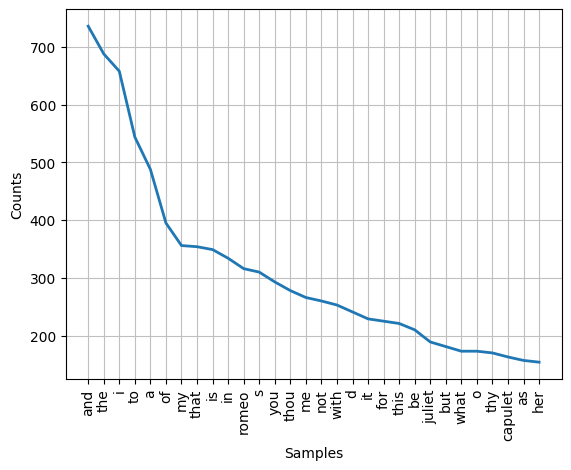

In [16]:
fdist = nltk.FreqDist(romeo_and_juliet)
fdist.plot(30)
plt.show()

The count of the most frequent word 'and' is at over 700. The words in the plot do a poor job of describing the play.

## PART II: FREQUENCY DISTRIBUTION WITHOUT STOP WORDS

The output frequency distribution plot in PART I consists almost entirely of stop words, and is therefore not helpful for analysis.

In PART II, I will explore three methods to deal with stop words and output the accompanying resulting plot:
- Method 1: Python
- Method 2: NLTK
- Method 3: Spacy

### Method 1: Python

Recall that 'lowered' is a list of lowercase words of the play only, with the punctuation removed. I join the list into a long string, and then remove any words with len>3.

In [17]:
lowered

['the',
 'tragedy',
 'of',
 'romeo',
 'and',
 'juliet',
 'by',
 'william',
 'shakespeare',
 'contents',
 'the',
 'prologue',
 'act',
 'i',
 'scene',
 'i',
 'a',
 'public',
 'place',
 'scene',
 'ii',
 'a',
 'street',
 'scene',
 'iii',
 'room',
 'in',
 'capulet',
 's',
 'house',
 'scene',
 'iv',
 'a',
 'street',
 'scene',
 'v',
 'a',
 'hall',
 'in',
 'capulet',
 's',
 'house',
 'act',
 'ii',
 'chorus',
 'scene',
 'i',
 'an',
 'open',
 'place',
 'adjoining',
 'capulet',
 's',
 'garden',
 'scene',
 'ii',
 'capulet',
 's',
 'garden',
 'scene',
 'iii',
 'friar',
 'lawrence',
 's',
 'cell',
 'scene',
 'iv',
 'a',
 'street',
 'scene',
 'v',
 'capulet',
 's',
 'garden',
 'scene',
 'vi',
 'friar',
 'lawrence',
 's',
 'cell',
 'act',
 'iii',
 'scene',
 'i',
 'a',
 'public',
 'place',
 'scene',
 'ii',
 'a',
 'room',
 'in',
 'capulet',
 's',
 'house',
 'scene',
 'iii',
 'friar',
 'lawrence',
 's',
 'cell',
 'scene',
 'iv',
 'a',
 'room',
 'in',
 'capulet',
 's',
 'house',
 'scene',
 'v',
 'an',
 'o

In [18]:
play = ' '.join(lowered)
play

'the tragedy of romeo and juliet by william shakespeare contents the prologue act i scene i a public place scene ii a street scene iii room in capulet s house scene iv a street scene v a hall in capulet s house act ii chorus scene i an open place adjoining capulet s garden scene ii capulet s garden scene iii friar lawrence s cell scene iv a street scene v capulet s garden scene vi friar lawrence s cell act iii scene i a public place scene ii a room in capulet s house scene iii friar lawrence s cell scene iv a room in capulet s house scene v an open gallery to juliet s chamber overlooking the garden act iv scene i friar lawrence s cell scene ii hall in capulet s house scene iii juliet s chamber scene iv hall in capulet s house scene v juliet s chamber juliet on the bed act v scene i mantua a street scene ii friar lawrence s cell scene iii a churchyard in it a monument belonging to the capulets dramatis personæ escalus prince of verona mercutio kinsman to the prince and friend to romeo p

In [19]:
play_python = [[word for word in line.split() if len(word)>3] for line in play.split('\n')]

In [20]:
play_python

[['tragedy',
  'romeo',
  'juliet',
  'william',
  'shakespeare',
  'contents',
  'prologue',
  'scene',
  'public',
  'place',
  'scene',
  'street',
  'scene',
  'room',
  'capulet',
  'house',
  'scene',
  'street',
  'scene',
  'hall',
  'capulet',
  'house',
  'chorus',
  'scene',
  'open',
  'place',
  'adjoining',
  'capulet',
  'garden',
  'scene',
  'capulet',
  'garden',
  'scene',
  'friar',
  'lawrence',
  'cell',
  'scene',
  'street',
  'scene',
  'capulet',
  'garden',
  'scene',
  'friar',
  'lawrence',
  'cell',
  'scene',
  'public',
  'place',
  'scene',
  'room',
  'capulet',
  'house',
  'scene',
  'friar',
  'lawrence',
  'cell',
  'scene',
  'room',
  'capulet',
  'house',
  'scene',
  'open',
  'gallery',
  'juliet',
  'chamber',
  'overlooking',
  'garden',
  'scene',
  'friar',
  'lawrence',
  'cell',
  'scene',
  'hall',
  'capulet',
  'house',
  'scene',
  'juliet',
  'chamber',
  'scene',
  'hall',
  'capulet',
  'house',
  'scene',
  'juliet',
  'chamber',

'play_python' is a nestled list. To be able to transform it into an NLTK object, I must turn into one full list. I found some code on StackOverflow and adapted it to make it work.

In [21]:
# remove nestled list
from functools import reduce

play_python_non_nestled = reduce(lambda x,y: x+y, play_python)
play_python_non_nestled

['tragedy',
 'romeo',
 'juliet',
 'william',
 'shakespeare',
 'contents',
 'prologue',
 'scene',
 'public',
 'place',
 'scene',
 'street',
 'scene',
 'room',
 'capulet',
 'house',
 'scene',
 'street',
 'scene',
 'hall',
 'capulet',
 'house',
 'chorus',
 'scene',
 'open',
 'place',
 'adjoining',
 'capulet',
 'garden',
 'scene',
 'capulet',
 'garden',
 'scene',
 'friar',
 'lawrence',
 'cell',
 'scene',
 'street',
 'scene',
 'capulet',
 'garden',
 'scene',
 'friar',
 'lawrence',
 'cell',
 'scene',
 'public',
 'place',
 'scene',
 'room',
 'capulet',
 'house',
 'scene',
 'friar',
 'lawrence',
 'cell',
 'scene',
 'room',
 'capulet',
 'house',
 'scene',
 'open',
 'gallery',
 'juliet',
 'chamber',
 'overlooking',
 'garden',
 'scene',
 'friar',
 'lawrence',
 'cell',
 'scene',
 'hall',
 'capulet',
 'house',
 'scene',
 'juliet',
 'chamber',
 'scene',
 'hall',
 'capulet',
 'house',
 'scene',
 'juliet',
 'chamber',
 'juliet',
 'scene',
 'mantua',
 'street',
 'scene',
 'friar',
 'lawrence',
 'cell',

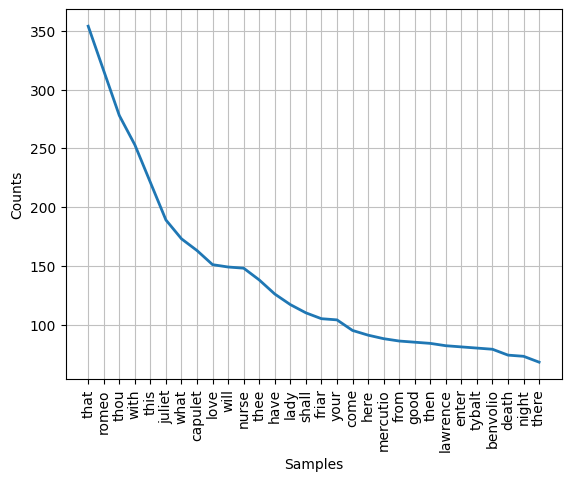

In [22]:
romeo_and_juliet_python = nltk.Text(play_python_non_nestled)

fdist_python = nltk.FreqDist(romeo_and_juliet_python)
fdist_python.plot(30)
plt.show()

This plot shows that the frequency counts are much lower than those in the plot in PART I, with 'that' having the highest count at over 350.

'Love', 'death', and 'night' suggest the play may deal with a tragic love story. Several character names in the plot do appear, again offering hints on the main characters of the play.

The next two methods will explore the frequency distribution when filtering out library default stop words.

### Method 2: NLTK

Natural Language Toolkit (NLTK) has stop words stored in 16 different languages. Since the play is in English, I use the English stop words as a filter.

In [23]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

NLTK currently has 179 stop words.

In [24]:
len(stopwords.words('english'))

179

In NLTK,  'word_tokenize divides strings into lists of substrings. Once tozenized, if the word isn't a default NLTK stop word, it is appended to the 'filtered_nltk' list that will then be used for the frequency distribution.

In [25]:
from nltk.tokenize import word_tokenize
 
play_nltk = word_tokenize(play)
 
filtered_nltk = []
 
for word in play_nltk:
    if word not in stopwords.words('english'):
        filtered_nltk.append(word)

print(filtered_nltk)

['tragedy', 'romeo', 'juliet', 'william', 'shakespeare', 'contents', 'prologue', 'act', 'scene', 'public', 'place', 'scene', 'ii', 'street', 'scene', 'iii', 'room', 'capulet', 'house', 'scene', 'iv', 'street', 'scene', 'v', 'hall', 'capulet', 'house', 'act', 'ii', 'chorus', 'scene', 'open', 'place', 'adjoining', 'capulet', 'garden', 'scene', 'ii', 'capulet', 'garden', 'scene', 'iii', 'friar', 'lawrence', 'cell', 'scene', 'iv', 'street', 'scene', 'v', 'capulet', 'garden', 'scene', 'vi', 'friar', 'lawrence', 'cell', 'act', 'iii', 'scene', 'public', 'place', 'scene', 'ii', 'room', 'capulet', 'house', 'scene', 'iii', 'friar', 'lawrence', 'cell', 'scene', 'iv', 'room', 'capulet', 'house', 'scene', 'v', 'open', 'gallery', 'juliet', 'chamber', 'overlooking', 'garden', 'act', 'iv', 'scene', 'friar', 'lawrence', 'cell', 'scene', 'ii', 'hall', 'capulet', 'house', 'scene', 'iii', 'juliet', 'chamber', 'scene', 'iv', 'hall', 'capulet', 'house', 'scene', 'v', 'juliet', 'chamber', 'juliet', 'bed', 'a

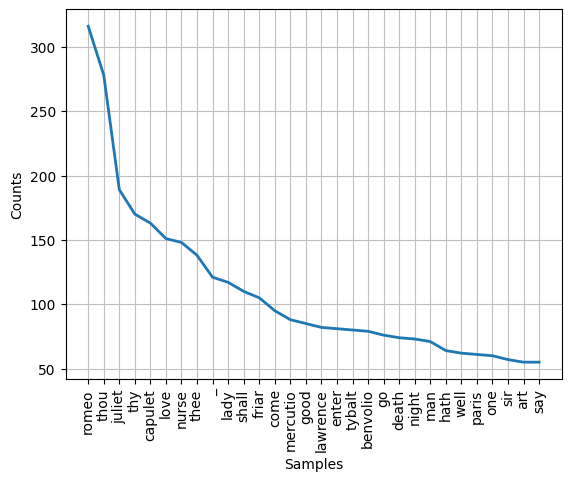

In [26]:
romeo_and_juliet_nltk = nltk.Text(filtered_nltk)

fdist_nltk = nltk.FreqDist(romeo_and_juliet_nltk)
fdist_nltk.plot(30)
plt.show()

The word 'romeo' now appears as having the highest count at over 300 and the words in this distribution are slightly different from those in the plot that used Python code. There continues to be many character names in the plot and there is also '_' that appears.

'Love', 'death', and 'night' again suggest a tragic love story. Several character names in the plot do appear, again offering hints on the main characters of the play. Is there a specific NLTK way to filter out character names?

Unfortunately, it is not possible to quickly add custom stop words in NLTK. The following method using SpaCy allows more flexibility.

### Method 3: SpaCy

An "nlp" object, in this case loading the SpaCy English small core web library, can be used to create documents with linguistic annotations.

In [27]:
import spacy
nlp = spacy.load('en_core_web_sm')

/Users/celia/opt/anaconda3/lib/python3.8/site-packages/spacy/util.py:833: UserWarning: [W095] Model 'en_core_web_sm' (3.1.0) was trained with spaCy v3.1 and may not be 100% compatible with the current version (3.2.0). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


Recall that 'play' is the play in one long lowercase string.

In [28]:
play

'the tragedy of romeo and juliet by william shakespeare contents the prologue act i scene i a public place scene ii a street scene iii room in capulet s house scene iv a street scene v a hall in capulet s house act ii chorus scene i an open place adjoining capulet s garden scene ii capulet s garden scene iii friar lawrence s cell scene iv a street scene v capulet s garden scene vi friar lawrence s cell act iii scene i a public place scene ii a room in capulet s house scene iii friar lawrence s cell scene iv a room in capulet s house scene v an open gallery to juliet s chamber overlooking the garden act iv scene i friar lawrence s cell scene ii hall in capulet s house scene iii juliet s chamber scene iv hall in capulet s house scene v juliet s chamber juliet on the bed act v scene i mantua a street scene ii friar lawrence s cell scene iii a churchyard in it a monument belonging to the capulets dramatis personæ escalus prince of verona mercutio kinsman to the prince and friend to romeo p

##### The Spacy Processing Pipeline

The SpaCy documentation concerning Piplelines explains that the nlp( ) function takes in raw text (in this case 'play') and 'tokenizes' it to produce a 'Doc' object that is processed in several steps (tagger, parser, ner, etc).

![](images/spacy_processing_pipeline.png)

SpaCy pipeline steps can be seen with 'nlp.pipeline'. For more information on each, see:

https://spacy.io/usage/processing-pipelines

In [29]:
nlp.pipeline

[('tok2vec', <spacy.pipeline.tok2vec.Tok2Vec at 0x7f85ec132ac0>),
 ('tagger', <spacy.pipeline.tagger.Tagger at 0x7f85ec47d340>),
 ('parser', <spacy.pipeline.dep_parser.DependencyParser at 0x7f85ec03cb30>),
 ('attribute_ruler',
  <spacy.pipeline.attributeruler.AttributeRuler at 0x7f85ec51d100>),
 ('lemmatizer',
  <spacy.lang.en.lemmatizer.EnglishLemmatizer at 0x7f85ec517180>),
 ('ner', <spacy.pipeline.ner.EntityRecognizer at 0x7f85ec03ccf0>)]

In [30]:
doc = nlp(play)

In [31]:
type(doc)

spacy.tokens.doc.Doc

##### SpaCy Tokenization

SpaCy tokenization splits the text into individual components. It is then possible to gather linguistic information on each word. For example, here I will show the word (.text), the parts of speech (.pos_) and the dependencies (.dep_) for the first ten words:

In [32]:
for token in doc[0:10]:
    print(f'{token.text:{15}} {token.pos_:{10}} {token.dep_:{10}}')

the             DET        det       
tragedy         NOUN       ROOT      
of              ADP        prep      
romeo           NOUN       pobj      
and             CCONJ      cc        
juliet          PROPN      conj      
by              ADP        prep      
william         PROPN      compound  
shakespeare     PROPN      compound  
contents        PROPN      pobj      


I specifically grab each token and put them in a list:

In [33]:
token_list_spacy = []
for token in doc:
    token_list_spacy.append(token.text)

In [34]:
token_list_spacy

['the',
 'tragedy',
 'of',
 'romeo',
 'and',
 'juliet',
 'by',
 'william',
 'shakespeare',
 'contents',
 'the',
 'prologue',
 'act',
 'i',
 'scene',
 'i',
 'a',
 'public',
 'place',
 'scene',
 'ii',
 'a',
 'street',
 'scene',
 'iii',
 'room',
 'in',
 'capulet',
 's',
 'house',
 'scene',
 'iv',
 'a',
 'street',
 'scene',
 'v',
 'a',
 'hall',
 'in',
 'capulet',
 's',
 'house',
 'act',
 'ii',
 'chorus',
 'scene',
 'i',
 'an',
 'open',
 'place',
 'adjoining',
 'capulet',
 's',
 'garden',
 'scene',
 'ii',
 'capulet',
 's',
 'garden',
 'scene',
 'iii',
 'friar',
 'lawrence',
 's',
 'cell',
 'scene',
 'iv',
 'a',
 'street',
 'scene',
 'v',
 'capulet',
 's',
 'garden',
 'scene',
 'vi',
 'friar',
 'lawrence',
 's',
 'cell',
 'act',
 'iii',
 'scene',
 'i',
 'a',
 'public',
 'place',
 'scene',
 'ii',
 'a',
 'room',
 'in',
 'capulet',
 's',
 'house',
 'scene',
 'iii',
 'friar',
 'lawrence',
 's',
 'cell',
 'scene',
 'iv',
 'a',
 'room',
 'in',
 'capulet',
 's',
 'house',
 'scene',
 'v',
 'an',
 'o

#### Customizing stop words in SpaCy

Notice that the SpaCy stop words are a set:

In [35]:
print(nlp.Defaults.stop_words)

{'over', 'used', 'yourselves', 'namely', 'into', 'formerly', 'my', 'become', 'always', 'one', 'nothing', 'also', 'from', 'once', 'than', 'none', 'yet', 'last', 'across', 'several', 'both', 'hereby', 'such', 'fifty', 'further', '‘m', 'beforehand', 'as', 'have', 'get', 'upon', 'or', 'thru', 'until', 'along', 'whenever', 'whose', 'before', '‘d', 'regarding', 'their', 'besides', 'would', 'among', 'nowhere', "'ve", "'m", 'we', 'nobody', 'much', 'whereafter', 'was', 'how', 'since', 'three', 'hereupon', 'indeed', 'please', 'during', 'otherwise', 'where', 'must', 'neither', '’s', 'whereupon', 'ca', 'whether', 'after', 'through', 'its', 'becomes', 'yourself', 'except', 'thereupon', 'did', 'ourselves', 'thereafter', 'thus', 'back', 'go', 'when', 'ours', 'herself', 'anyhow', 'whence', 'own', 'of', 'could', 'moreover', 'being', 'someone', 'done', 'ever', 'never', 'just', '‘ll', 'becoming', 'somewhere', 'keep', 'now', 'are', 'they', 'any', 'quite', '’re', 'amongst', 'it', 'elsewhere', 'call', 'myse

Currently, SpaCy has 326 default English stop words.

In [36]:
len(nlp.Defaults.stop_words)

326

I copy and paste an additional 26 items in alphabetical to the default stop words. These consist mostly of character names, including 'friar' and 'nurse', as well as '_', 'scene', and single or double letters.

The pipe symbol "|" is used as a union set operator. Therefore, if the word that I would like to add to the default stop words is not already present, it is added to the set.

In [37]:
nlp.Defaults.stop_words |= {
    '_',
    'abram',
    'balthasar',
    'benvolio',
    'capulet',
    'chorus',
    'd',
    'escalus',
    'friar',
    'gregory',
    'john',
    'juliet',
    'lady',
    'lawrence',
    'll',
    'mercutio',
    'montague',
    'nurse',
    'o',
    'paris',
    'peter',
    'romeo',
    's',
    'sampson',
    'scene',
    'tybalt'
}

There are now 352 Spacy stop words:

In [38]:
len(nlp.Defaults.stop_words)

352

And to double confirm, I can check the default stop words.

In [39]:
nlp.Defaults.stop_words

{"'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 '_',
 'a',
 'about',
 'above',
 'abram',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amount',
 'an',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'are',
 'around',
 'as',
 'at',
 'back',
 'balthasar',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'below',
 'benvolio',
 'beside',
 'besides',
 'between',
 'beyond',
 'both',
 'bottom',
 'but',
 'by',
 'ca',
 'call',
 'can',
 'cannot',
 'capulet',
 'chorus',
 'could',
 'd',
 'did',
 'do',
 'does',
 'doing',
 'done',
 'down',
 'due',
 'during',
 'each',
 'eight',
 'either',
 'eleven',
 'else',
 'elsewhere',
 'empty',
 'enough',
 'escalus',
 'even',
 'ever',
 'every',
 'everyone',
 'everything',
 'everywhere',
 'except',
 'few',
 'fifteen',
 'fifty',
 

Wikipedia defines a lexeme as "a basic abstract unit of meaning, a unit of morphological analysis in linguistics that roughly corresponds to a set of forms taken by a single root word. For example, in English, run, runs, ran and running are forms of the same lexeme, which can be represented as run."

https://en.wikipedia.org/wiki/Lexeme

I use 'lexeme' as the variable name for each nlp tokenized word and create a list with the default stop words filtered out. Notice that 'romeo', 'juliet' and all other added custom stop words no longer appear in the list.

In [44]:
# import again because I changed default stop words
import spacy
nlp = spacy.load('en_core_web_sm')

In [45]:
filtered_spacy = []

for word in token_list_spacy:
    lexeme = nlp.vocab[word]
    if lexeme.is_stop == False:
        filtered_spacy.append(word)
        
filtered_spacy

['tragedy',
 'william',
 'shakespeare',
 'contents',
 'prologue',
 'act',
 'public',
 'place',
 'ii',
 'street',
 'iii',
 'room',
 'house',
 'iv',
 'street',
 'v',
 'hall',
 'house',
 'act',
 'ii',
 'open',
 'place',
 'adjoining',
 'garden',
 'ii',
 'garden',
 'iii',
 'cell',
 'iv',
 'street',
 'v',
 'garden',
 'vi',
 'cell',
 'act',
 'iii',
 'public',
 'place',
 'ii',
 'room',
 'house',
 'iii',
 'cell',
 'iv',
 'room',
 'house',
 'v',
 'open',
 'gallery',
 'chamber',
 'overlooking',
 'garden',
 'act',
 'iv',
 'cell',
 'ii',
 'hall',
 'house',
 'iii',
 'chamber',
 'iv',
 'hall',
 'house',
 'v',
 'chamber',
 'bed',
 'act',
 'v',
 'mantua',
 'street',
 'ii',
 'cell',
 'iii',
 'churchyard',
 'monument',
 'belonging',
 'capulets',
 'dramatis',
 'personæ',
 'prince',
 'verona',
 'kinsman',
 'prince',
 'friend',
 'young',
 'nobleman',
 'kinsman',
 'prince',
 'page',
 'head',
 'veronese',
 'family',
 'feud',
 'capulets',
 'wife',
 'son',
 'nephew',
 'friend',
 'servant',
 'servant',
 'head',


In [46]:
romeo_and_juliet_spacy = nltk.Text(filtered_spacy)

In [47]:
romeo_and_juliet_spacy

<Text: tragedy william shakespeare contents prologue act public place...>

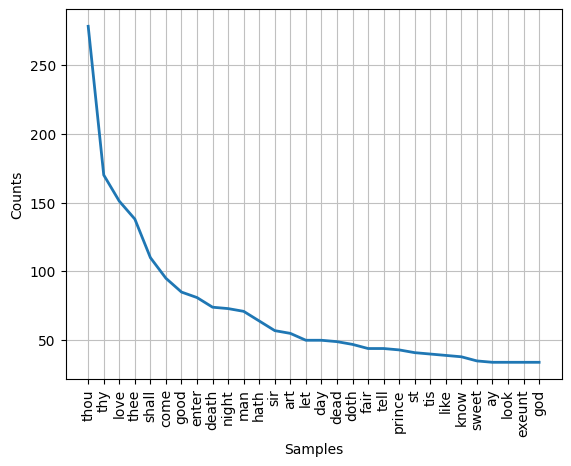

In [48]:
fdist_spacy = nltk.FreqDist(romeo_and_juliet_spacy)
fdist_spacy.plot(30)
plt.show()

The max frequency count is at over 250 and the character names have now been removed from the distribution. 

'Thou', 'thy', 'thee', suggest the play is literary or archaic. While 'love', 'death', 'dead', 'prince', 'sweet', and 'god' reinforce that the text concerns a tragic love story.

## CONCLUSION

For the play 'Romeo and Juliet', the Python method to remove stop words was surprising effective. The frequency plot did suggest the text concerned a tragic love story and it did give a sense of who were the main characters. It should be noted that for someone not familiar with the play, keeping character names (i.e. not turning them into stop words to be filtered out), could help determine the play's main characters. But when possible, it is preferable to use libraries to filter out stop words.

NLTK was quite easy to use, and yielded similar results to the Python method. But there is no quick way to add stop words.

Spacy features allowing to add or remove default stop words is quite useful. It means these can be determined to reflect changing needs or project requirements. For example:

- 'thou', 'thy', 'thee', 'hath', 'art', 'doth', 'tis'

are just archaic or literary versions of the default stop words:

- 'you', 'your', 'you', 'has', 'are', 'does', 'it is'

Not removing them shows the text has literary or archaic words, which could be useful to know. But this would come as no surprise to someone familiar with the play. Using SpaCy, those words could be added to the default stop words, and the frequency distribution would be even more filtered.

All in all, web scraping text from Project Gutenberg was a fun way to practice filtering out stop words.

## Resources

##### Project Gutenberg
https://www.gutenberg.org/

##### StackOverflow (Greg Hewgill)
https://stackoverflow.com/questions/952914/how-to-make-a-flat-list-out-of-a-list-of-lists

##### NLTK
https://www.nltk.org/

##### SpaCy
https://spacy.io/